In [107]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# pip install mat4py
from mat4py import loadmat

%matplotlib inline

print('libraries imported!')

libraries imported!


<h1>Linear Kernel SVM<h1>

In [157]:
# reading matlab files

data = loadmat('data/data1.mat')
X = np.array(data['X'])
y = np.squeeze(np.array(data['y']))

In [158]:
# since the SVM fitting algorithm is very sensitive to feature scaling, let's just get that out of the way 
# right from the start

# scale the data for SVMs

from sklearn.preprocessing import StandardScaler

print('before X mean: ', np.mean(X, axis=0))
X = StandardScaler().fit(X).transform(X)
print('after X mean: ', np.mean(X, axis=0))

before X mean:  [2.26877951 3.13251176]
after X mean:  [-2.08983158e-16  1.91567894e-16]


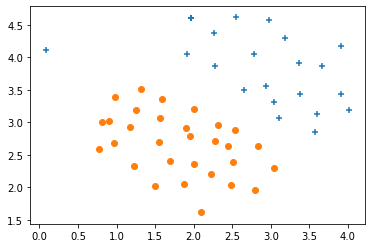

In [49]:
# plotting data
# NOTE: there is an outlier positive example + on the far left at about (0.1, 4.1) coordinates

_ = plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1], marker='+')
_ = plt.scatter(X[np.where(y == 0), 0][0], X[np.where(y == 0), 1][0], marker='o')
plt.show()

In [96]:
# fitting Linear SVC (with linear kernel) to training data

clf = LinearSVC(random_state=0, C=1, tol=1e-3, max_iter=2000)
clf.fit(X, y)

w = np.squeeze(clf.coef_).reshape(2, 1)
b = clf.intercept_.reshape(1, 1)

print('theta intercept: ', b,  'theta co-efficients: ', w)

theta intercept:  [[-3.56326041]] theta co-efficients:  [[0.44887386]
 [0.76400079]]


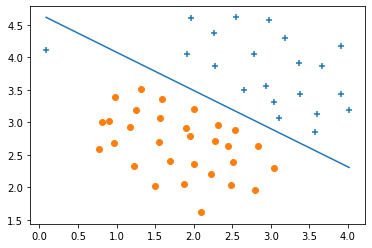

In [98]:
# plotting Linear SVC decision boundary

x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 51)
y_values = - (w[0, 0]*x_values + b[0, 0]) / w[1, 0]

_ = plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1], marker='+')
_ = plt.scatter(X[np.where(y == 0), 0][0], X[np.where(y == 0), 1][0], marker='o')
_ = plt.plot(x_values, y_values)

plt.show()

<h1>Guassian Kernel SVM<h1>

In [182]:
# reading matlab files

data = loadmat('data/data2.mat')
X = np.array(data['X'])
y = np.squeeze(np.array(data['y']))

In [183]:
# since the SVM fitting algorithm is very sensitive to feature scaling, let's just get that out of the way 
# right from the start

from sklearn.preprocessing import StandardScaler

print('before X mean: ', np.mean(X, axis=0))
X = StandardScaler().fit(X).transform(X)
print('after X mean: ', np.mean(X, axis=0))

before X mean:  [0.50341351 0.69430419]
after X mean:  [ 1.25945347e-15 -1.63638898e-16]


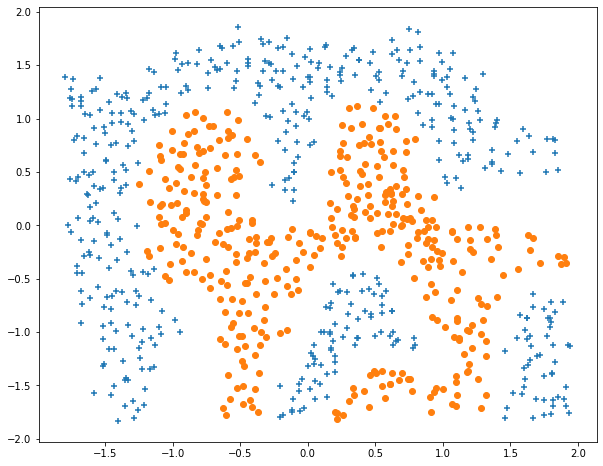

In [184]:
# plotting data
# NOTE: data is non-linearly seperable

fig, ax = plt.subplots(1, 1, figsize=(10,8))
_ = ax.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1], marker='+')
_ = ax.scatter(X[np.where(y == 0), 0][0], X[np.where(y == 0), 1][0], marker='o')
plt.show()

In [185]:
# fitting SVC (with Guassian kernel) to training data to learn complex non-linear decision boundary

clf = SVC(kernel='rbf', gamma='auto', random_state=0, C=1e6, tol=1e-4)
clf.fit(X, y)

clf.score(X, y)    # returns the mean accuracy for classifying data (X,y)

1.0

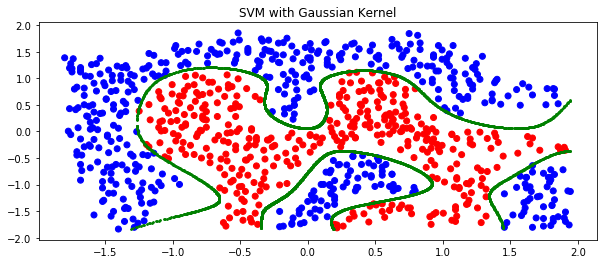

In [186]:
# Generate a set of points that form a grid over feature space

x1s = np.linspace(min(X[:, 0]), max(X[:, 0]), 1200)
x2s = np.linspace(min(X[:, 1]), max(X[:, 1]), 1200)
points = np.array([[x1, x2] for x1 in x1s for x2 in x2s])

# Compute decision function for each point, keep those which are close to the boundary
dist = clf.decision_function(points)
bounds = np.array([pt for pt, dist_ in zip(points, dist) if abs(dist_)<0.05])

# Visualize the decision boundary
fig, ax1 = plt.subplots(figsize=[10, 4], nrows=1, ncols=1)

ax1.scatter(X[:, 0], X[:, 1], color=["r" if y_ == 0 else "b" for y_ in y], label="data")
ax1.scatter(bounds[:, 0], bounds[:, 1], color="g", s=3, label="decision boundary")
ax1.set_title("SVM with Gaussian Kernel")

plt.show()